# Activity 1-1: Applying numerical integration to solve a physics problem

Our goal is to write a function to perform numerical integration, and to apply it to solve a physics problem. The input parameters to the integrator function should be:
* A function, $f$
* Two real numbers giving the limits of integration
* The number of subdivisions $n$ to use for estimating the integral

There are many different ways that you could implement this function. We just covered one example using the **trapezoidal rule**. You could repeat that analysis, or you could try a more sophisticated method like [Simpson's rule](https://en.wikipedia.org/wiki/Simpson%27s_rule). If you're already comfortable with Python, you might want to try an implementation that uses `numpy` arrays and [vectorization](https://realpython.com/numpy-array-programming/).

## 1. Defining and testing the integration function

### a. Write the integration function

Fill in the function outline below. If you're having trouble getting started, try writing out all the individual computations that need to be performed to estimate the integral. Then, code each one of them individually.

In [0]:
def integrate(function_name, lower_limit, upper_limit, n_div):
    """
    Integrate the input univariate function, function_name, 
    between lower_limit and upper_limit using your favorite method 
    and return the result. The integral bounds will be 
    subdivided into n_div divisions to estimate the integral.
    """
    
    # Define the step size
    dx = (upper_limit - lower_limit) / n_div

    # Make the variable to hold the total value of the integral
    total = 0

    # Iterate over all the trapezoids
    for i in range(n_div):
      f_avg = (function_name(lower_limit + i*dx) 
               + function_name(lower_limit + (i+1)*dx)) / 2
      total = total + f_avg * dx
    
    return total # Return the result here

### b. Test the function

Test your function in the cell below. Compare your output with the analytical result here. Does it perform as expected?

In [2]:
def test_quad(x):
    return 3*x**2

integrate(test_quad, 0, 1, 100)

1.0000499999999999

## 2. Application: diffraction patterns generated by a circular aperture

When might we need to perform numerical integration? Here is one example from Exercise 5.4 in Mark Newman's [Computational Physics](http://www-personal.umich.edu/~mejn/cp/chapters.html) textbook.

When light with wavelength $\lambda$ passes through a circular aperture, as in a telescope, it doesn't produce just a single point of light in the focal plane. Rather, the light is *diffracted*, producing a central bright spot surrounded by alternating bright and dark rings. Mathematically, the intensity of the focused light is given by

$$I(r) = \frac{J_1(kr)}{kr}^2\,,$$

where $r$ is the distance from the center of the focal plane, $k = 2\pi/\lambda$, and $J_1$ is the order 1 [Bessel function](https://en.wikipedia.org/wiki/Bessel_function) of the first kind. For more information, follow the Wikipedia link. Bessel functions appear very frequently in physics.

One way to define the Bessel functions $J_m$ is through an integral,

$$ J_m(x) = \frac{1}{\pi}\int_0^\pi\!d\theta\; \cos(m\theta - x \sin \theta) \, $$ 

where $m$ is a nonnegative integer and $x\geq 0$. 

Below, we'll write a function to evaluate the Bessel function using our integrator defined in part 1. Then we'll test it and plot the results.

### a. Check the sine and cosine functions

In order to evaluate the Bessel function, we need to know how to evaluate **sine**, **cosine**, and **pi**. We can use `numpy`!

Execute the code block below to see how these work.

In [3]:
import numpy as np

print('pi =', np.pi)
print('cos(0) =', np.cos(0))
print('sin(pi/2) =', np.sin(np.pi/2))

pi = 3.141592653589793
cos(0) = 1.0
sin(pi/2) = 1.0


### b. Write the Bessel function

Write your own version of the Bessel function by filling in the cell below. We'll assume that the number of divisions `n_div` is 1000.

In [0]:
def J(m, x):
    """
    mth Bessel function of the first kind evaluated at real number x,  
    calculated using numerical integration 1000 divisions.
    """
    
    # Fill in your code here, using the integrate function you defined 
    # in part 1
    
    # Remember: you'll need to evaluate sine and cosine functions, 
    # and to use the constant pi
    
    # You might want to define a function for the integrand
    def integrand(theta):
        return np.cos(m * theta - x * np.sin(theta)) / np.pi
    
    return integrate(integrand, 0, np.pi, 1000) # Return your result here

### c. Test the function

Now, test your function in the cell below.

In [8]:
print(J(1,1))

0.4400505857449337


How does this compare with the expected result? Let's check our answer against the builtin Bessel function evaluator in `scipy`.

In [9]:
import scipy.special as sp

print(J(1, 1) - sp.jv(1, 1))

1.6653345369377348e-16


### An aside 

Why are we implementing our own method to evaluate the Bessel function when another one already exists? As you might have guessed, this is just for practice, and practice works best when there are well-established results that you can compare with. 

In your own computational adventures, the first step in any problem is to **check whether someone else has already solved it first**. If a solution exists, it will almost always be better to use the existing software and build on top of it, rather than "reinventing the wheel." Why? Consider the frenzied activity in the [numpy repository](https://github.com/numpy/numpy) on GitHub. Hundreds of people are working to ensure that numpy is fast and accurate. This is not a situation where a team of 1 can compete.

However, in research or industry we may encounter niche problems that have not yet been solved, or where standard techniques fail. In these cases we may indeed need to start from the beginning.

### d. Plot the Bessel function(s)

Now, let's use our function `J(m, x)` to plot three different Bessel functions, $J_0(x)$, $J_1(x)$ and $J_2(x)$. Your job is to fill in the following code to produce these plots. The outline below uses `seaborn`, but you're also welcome to use `matplotlib` directly if you'd like.

*Hint*: You can check your answers by consulting [Wikipedia](https://en.wikipedia.org/wiki/Bessel_function).

*Hint*$^2$: Your function for evaluating the Bessel functions might take a little bit of time. You can potentially make it faster, and easier to use, with the `numpy.vectorize` function. For more information, look [here](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.vectorize.html). If you vectorize `J(m, x)` then it will be able to operate on entire numpy arrays at once.

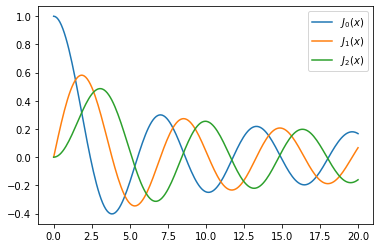

In [10]:
import seaborn as sns
import numpy as np

# x sample points (this function will create an array 
# of 200 evenly spaced points from 0 to 20)
x = np.linspace(0, 20, 200)

y0 = J(0, x)
y1 = J(1, x)
y2 = J(2, x)

sns.lineplot(x, 
             y0,
             label='$J_0(x)$')

sns.lineplot(x, 
             y1,
             label='$J_1(x)$')

sns.lineplot(x, 
             y2,
             label='$J_2(x)$')